In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import numpy as np

In [5]:
nba1 = Table.read_table('nba2013.csv')
nba = nba1.sort('Position', descending=True).relabel('Age', 'Age in 2013')

In [31]:
ontime = Table.read_table('airline_ontime.csv')
ua1 = ontime.where('CARRIER', 'UA')
ua_delays = ua1['DEP_DELAY']
ua_delays = [x for x in ua_delays if str(x) != 'nan']
ua = Table().with_column('Departure Delay', ua_delays)

# Variability

###The Rough Size of Deviations from Average

As we have seen, inference based on test statistics must take into account the way in which the statistics vary across samples. It is therefore important to be able to quantify the variability in any list of numbers. One way is to create a measure of the difference between the values in the list and the average of the list.

We will start by defining such a measure in the context of a simple list of just four numbers. We have placed the list in a table called ``toy``, a fitting name for the list.

In [2]:
toy = Table().with_column('value', [1, 2, 2, 10])
toy

value
1
2
2
10


The goal is to get a measure of roughly how far off the numbers in the list are from the average. To do this, we need the average, and all the deviations from the average. A "deviation from average" is just a value minus the average.

In [41]:
# Step 1. The average.

ave = np.mean(toy['value'])
ave

3.75

In [42]:
# Step 2. The deviations from average.

toy['dev_from_ave'] = toy['value'] - ave
toy

value,dev_from_ave
1,-2.75
2,-1.75
2,-1.75
10,6.25


Some of the deviations are negative; those correspond to values that are below average. Positive deviations correspond to above-average values.

To calculate roughly how big the deviations are, it is natural to compute the mean of the deviations. But something interesting happens when all the deviations are added together:

In [28]:
sum(toy['dev_from_ave'])

0.0

The positive deviations exactly cancel out the negative ones. This is true of all lists of numbers, no matter what the histogram of the list looks like: the sum of the deviations from average is zero. 

Since the sum of the deviations is 0, the mean of the deviations will be 0 as well:

In [29]:
np.mean(toy['dev_from_ave'])

0.0

Because of this, the mean of the deviations is not a useful measure of the size of the deviations. What we really want to know is roughly how big the deviations are, regardless of whether they are positive or negative. So we need a way to eliminate the signs of the deviations.

There are two time-honored ways of losing signs: the absolute value, and the square. It turns out that taking the square constructs a measure with extremely powerful properties, some of which we will study in this course.

So let us eliminate the signs by squaring all the deviations. Then we will take the mean of the squares:

In [43]:
# Step 3. The squared deviations from average

toy['sq_dev_from_ave'] = toy['dev_from_ave']**2
toy

value,dev_from_ave,sq_dev_from_ave
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [44]:
# Variance = the mean squared deviation from average

var = np.mean(toy['sq_dev_from_ave'])
var

13.1875

**Variance:** The mean squared deviation is called the *variance* of the list. While it does give us an idea of spread, it is not on the same scale as the original variable and its units are the square of the original. This makes interpretation very difficult. So we return to the original scale by taking the positive square root of the variance:

In [45]:
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = var**0.5
sd

3.6314597615834874

##Standard Deviation

The quantity that we have just computed is called the *standard deviation* of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition.** The SD of a list is defined as the *root mean square of deviations from average*. That's a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

**Computation.** The ``numPy`` function ``np.std`` computes the SD of values in an array:

In [46]:
np.std(toy['value'])

3.6314597615834874

###Working with the SD

Let us now examine the SD in the context of a more interesting dataset. The table ``nba`` contains data on the players in the National Basketball Association (NBA) in 2013. For each player, the table records the position at which the player usually played (C is center, F is forward, and G is guard), his height in inches, weight in pounds, and age in years.

In [6]:
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,G,80,221,23
Darius Miller,G,80,235,23
Trevor Ariza,G,80,210,28
James Jones,G,80,215,32
Wesley Johnson,G,79,215,26
Klay Thompson,G,79,205,23
Thabo Sefolosha,G,79,215,29
Chase Budinger,G,79,218,25
Kevin Martin,G,79,185,30
Evan Fournier,G,79,206,20


Here is a histogram of the players' heights.

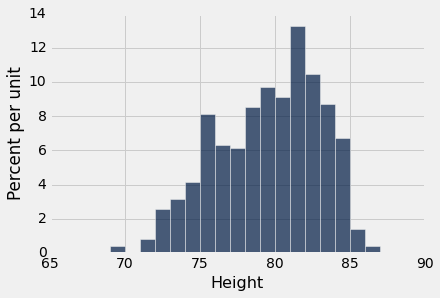

In [28]:
nba.select('Height').hist(bins=np.arange(68, 88, 1))

It is no surprise that NBA players are tall! Their average height is just over 79 inches.

In [9]:
mean_height = np.mean(nba['Height'])
mean_height

79.065346534653472

About far off are the players' heights from the average? This is measured by the SD of the heights, which is about 3.45 inches.

In [10]:
sd_height = np.std(nba['Height'])
sd_height

3.4505971830275546

The towering center Hasheem Thabeet of the Oklahoma City Thunder was the tallest player at a height of 87 inches.

In [14]:
nba.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,C,87,263,26
Roy Hibbert,C,86,278,26
Tyson Chandler,C,85,235,30


Thabeet was about 8 inches above the average height.

In [12]:
87 - mean_height

7.9346534653465284

That's a deviation from average, and it is about 2.3 times the standard deviation:

In [13]:
(87 - mean_height)/sd_height

2.2995015194397923

In other words, the height of the tallest player was about 2.3 SDs above average.

At 69 inches tall, Isaiah Thomas was one of the two shortest players in the NBA. His height was about 2.9 SDs below average.

In [15]:
nba.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,G,69,185,24
Nate Robinson,G,69,180,29
John Lucas III,G,71,157,30


In [16]:
(69 - mean_height)/sd_height

-2.9169868288775844

What we have observed is that the tallest and shortest players were both just a few SDs away from the average height. This is an example of why the SD is a useful measure of spread. No matter what the shape of the histogram, the average and the SD together tell you a lot about the data.

###First main reason for measuring spread by the SD

**Informal statement.** For all lists, the bulk of the entries are within the range "average $\pm$ a few SDs".

Try to resist the desire to know exactly what fuzzy words like "bulk" and "few" mean. We wil make them precise later in this section. For now, let us examine the statement in the context of some examples.

We have already seen that *all* of the heights of the NBA players were in the range "average $\pm$ 3 SDs". 

What about the ages? Here is a histogram of the distribution. Yes, there was a 15-year-old player in the NBA in 2013.

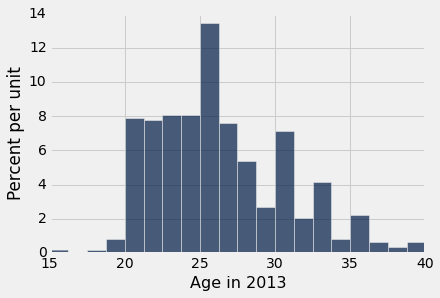

In [25]:
nba.select('Age in 2013').hist(bins=20)

Juwan Howard was the oldest player, at 40. His age was about 3.2 SDs above average.

In [20]:
nba.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,F,81,250,40
Marcus Camby,C,83,235,39
Derek Fisher,G,73,210,39


In [23]:
(40 - np.mean(nba['Age in 2013']))/np.std(nba['Age in 2013'])

3.1958482778922357

The youngest was 15-year-old Jarvis Varnado, who won the NBA Championship that year with the Miami Heat. His age was about 2.6 SDs below average.

In [18]:
nba.sort('Age in 2013').show(3)

Name,Position,Height,Weight,Age in 2013
Jarvis Varnado,F,81,230,15
Giannis Antetokounmpo,F,81,205,18
Sergey Karasev,G,79,197,19


In [19]:
(15 - np.mean(nba['Age in 2013']))/np.std(nba['Age in 2013'])

-2.5895811038670811

What we have observed for the heights and ages is true in great generality. For all lists, the bulk of the entries are no more than 2 or 3 SDs away from the average. 

These rough statements about deviations from average are made precise by the following result.

###Chebychev's inequality

For all lists, and all positive numbers *z*, the proportion of entries that are in the range
"average $\pm z$ SDs" 
is **at least** $1 - \frac{1}{z^2}$.
          

What makes this result powerful is that it is true for all lists – all distributions, no matter how irregular. 

Specifically, Chebychev's inequality says that for every list:

- the proportion in the range "average $\pm$ 2 SDs" is at least 1 - 1/4 = 0.75

- the proportion in the range "average $\pm$ 3 SDs" is at least 1 - 1/9 $\approx$ 0.89

- the proportion in the range "average $\pm$ 4.5 SDs" is at least 1 - 1/$4.5^2$ $\approx$ 0.95

Chebychev's Inequality gives a lower bound, not an exact answer or an approximation. For example, the percent of entries in the range "average $\pm ~2$ SDs" might be quite a bit larger than 75%. But it cannot be smaller.

###Standard units

In the calculations above, $z$ measures *standard units*, the number of standard deviations above average.

Some values of standard units are negative, corresponding to original values that are below average. Other values of standard units are positive. But no matter what the distribution of the list looks like, Chebychev's Inequality says that standard units will typically be in the (-5, 5) range.

To convert a value to standard units, first find how far it is from average, and then compare that deviation with the standard deviation.
$$
z ~=~ \frac{\mbox{value }-\mbox{ average}}{\mbox{SD}}
$$

As we will see, standard units are frequently used in data analysis. So it is useful to define a function that converts an array of numbers to standard units.

In [30]:
def standard_units(array_name):
    return (array_name - np.mean(array_name))/np.std(array_name)    

As we saw in an earlier section, the table ``ua`` contains a column ``Departure Delay`` consisting of the departure delay times, in minutes, of over 37,000 United Airlines flights. We can create a new column called ``Delay_su`` by applying the function ``standard_units`` to the column of delay times. This allows us to see all the delay times in minutes as well as their corresponding values in standard units. 

In [33]:
ua['Delay_su'] = standard_units(ua['Departure Delay'])
ua

Departure Delay,Delay_su
-5,-0.496452
19,0.130303
6,-0.209189
-4,-0.470337
-3,-0.444222
-6,-0.522566
21,0.182533
-3,-0.444222
-2,-0.418107
-1,-0.391992


Something rather alarming happens when we sort the delay times from highest to lowest. The standard units are extremely high!

In [35]:
ua.sort('Departure Delay', descending=True)

Departure Delay,Delay_su
886,22.7718
739,18.933
678,17.3399
595,15.1724
566,14.4151
558,14.2062
543,13.8145
541,13.7622
537,13.6578
513,13.031


What this shows is that it is possible for data to be many SDs above average (and for flights to be delayed by almost 15 hours). The highest value is more than 22 in standard units. 

However, the proportion of these extreme values is tiny, and the bounds in Chebychev's inequality still hold true. For example, let us calculate the percent of delay times that are in the range "average $\pm$ 2 SDs". This is the same as the percent of times for which the standard units are in the range (-2, 2). That is just about 96%, as computed below, consistent with Chebychev's bound of "at least 75%". 

In [76]:
ua.where(np.logical_and(ua[1] > -2, ua[1] < 2)).num_rows/ua.num_rows

0.9603246649223047

The histogram of delay times is shown below, with the horizontal axis in standard units. By the table above, the right hand tail continues all the way out to 22 standard units (886 minutes). The area of the histogram between $z=2$ and $z=22$ is about 4%, put together in tiny little bits that are all but invisible.

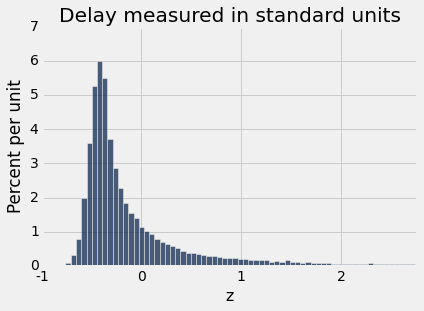

In [71]:
mean_delay = np.mean(ua['Departure Delay'])
sd_delay = np.std(ua['Departure Delay'])
plotrange = np.arange(-15, 121, 2)
ua.select('Departure Delay').hist(bins=plotrange)
positions = np.array([-1, 0, 1, 2])*sd_delay + mean_delay
plots.xticks(positions, ['-1', '0', '1', '2'])
plots.xlabel('z')
plots.title('Delay measured in standard units')